                 date       Cycle end time Cycle timezone  \
0 2025-07-07 01:33:54                  NaN      UTC-05:00   
1 2025-07-06 00:23:23  2025-07-07 01:33:54      UTC-05:00   
2 2025-07-05 01:37:55  2025-07-06 00:23:23      UTC-05:00   
3 2025-07-04 00:21:53  2025-07-05 01:37:55      UTC-05:00   
4 2025-07-02 23:32:18  2025-07-04 00:21:53      UTC-05:00   

           Sleep onset           Wake onset  sleep_perf  \
0  2025-07-07 01:33:54  2025-07-07 04:47:55          37   
1  2025-07-06 00:23:23  2025-07-06 07:32:24          82   
2  2025-07-05 01:37:55  2025-07-05 08:35:56          73   
3  2025-07-04 00:21:53  2025-07-04 07:26:24          77   
4  2025-07-02 23:32:18  2025-07-03 07:18:49          79   

   Respiratory rate (rpm)  asleep_min  In bed duration (min)  \
0                    16.8         186                    194   
1                    17.1         403                    427   
2                    17.0         371                    417   
3                    1

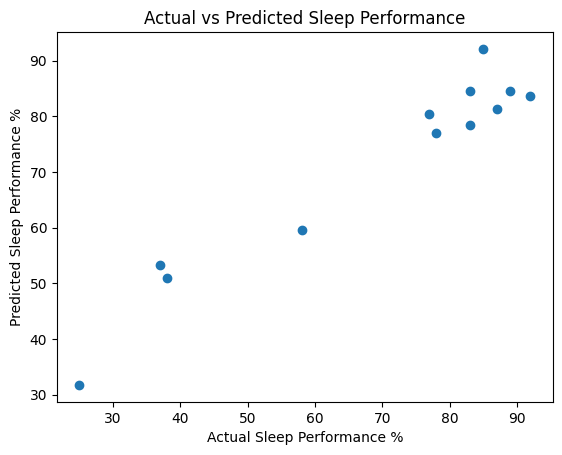

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1) Load your WHOOP sleep data
df = pd.read_csv('/Users/briannarawlings/wearable_sleep_analysis/data/sleeps.csv')

# 2) Clean and prepare columns
df = df.rename(columns={
    'Cycle start time': 'date',
    'Asleep duration (min)': 'asleep_min',
    'Deep (SWS) duration (min)': 'deep_min',
    'REM duration (min)': 'rem_min',
    'Sleep performance %': 'sleep_perf'
})

df['date'] = pd.to_datetime(df['date'])
df['asleep_hr'] = df['asleep_min'] / 60
df['deep_hr'] = df['deep_min'] / 60
df['rem_hr'] = df['rem_min'] / 60

print(df.head())

# 3) Define features & target
X = df[['asleep_hr', 'deep_hr', 'rem_hr']]
y = df['sleep_perf']

# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5) Fit model
model = LinearRegression()
model.fit(X_train, y_train)

# 6) Predict & evaluate
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# 7) Plot actual vs predicted
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sleep Performance %")
plt.ylabel("Predicted Sleep Performance %")
plt.title("Actual vs Predicted Sleep Performance")
plt.show()


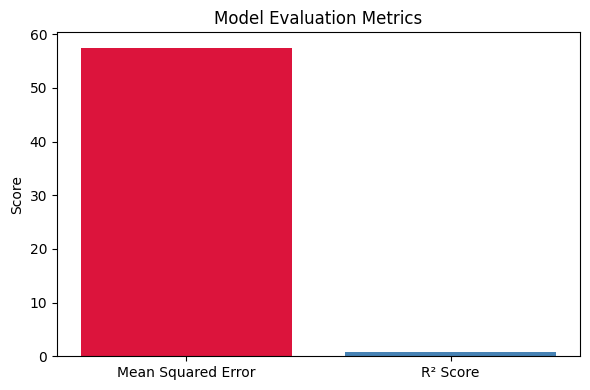

In [3]:
# Bar chart of evaluation metrics
metrics = {'Mean Squared Error': mse, 'R² Score': r2}
plt.figure(figsize=(6,4))
plt.bar(metrics.keys(), metrics.values(), color=['crimson', 'steelblue'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.tight_layout()
plt.show()
